<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
import pandas as pd

In [0]:
#!pip install pandas==0.23.4

In [3]:
# TODO - your code here
# Use what we did live in lecture as an example
weight_data_url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
weight_data = pd.read_csv(weight_data_url)
weight_data.head()
# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [4]:
weight_data.isna().sum()

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64

In [0]:
weight_bins = pd.cut(weight_data.weight, 6)
exercise_bins = pd.cut(weight_data.exercise_time, 6)
age_bins = pd.cut(weight_data.age, 6)

In [14]:
pd.crosstab(weight_bins, exercise_bins, normalize = 'columns')

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
"(99.854, 124.333]",0.141079,0.159091,0.262887,0.268421,0.296774,0.448718
"(124.333, 148.667]",0.153527,0.178030,0.139175,0.326316,0.406452,0.435897
"(148.667, 173.0]",0.153527,0.238636,0.252577,0.231579,0.270968,0.115385
"(173.0, 197.333]",0.195021,0.170455,0.211340,0.163158,0.025806,0.000000
"(197.333, 221.667]",0.215768,0.234848,0.134021,0.010526,0.000000,0.000000
"(221.667, 246.0]",0.141079,0.018939,0.000000,0.000000,0.000000,0.000000


Okay, so right off the bat we appear to be starting according to our intution (at least for the bottom right of the crosstab): people who exercise more tend to not weigh extreme amounts.

In [15]:
pd.crosstab(weight_bins, age_bins, normalize = 'columns')

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
weight,,,,,,
"(99.854, 124.333]",0.267943,0.322581,0.245,0.271739,0.156250,0.196970
"(124.333, 148.667]",0.272727,0.225806,0.320,0.271739,0.250000,0.181818
"(148.667, 173.0]",0.229665,0.202765,0.195,0.179348,0.229167,0.227273
"(173.0, 197.333]",0.110048,0.129032,0.110,0.152174,0.166667,0.176768
"(197.333, 221.667]",0.095694,0.101382,0.105,0.119565,0.151042,0.141414
"(221.667, 246.0]",0.023923,0.018433,0.025,0.005435,0.046875,0.075758


This leads me to think that either age has no bearing on weight (which would be counter to my intuition, though that might be wrong), or the relation is a bit subtler than initially anticipated.  

In [16]:
#might as well plot the last 2 variable combination
pd.crosstab(exercise_bins, age_bins, normalize = 'columns')

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.138756,0.221198,0.135,0.141304,0.229167,0.338384
"(50.0, 100.0]",0.167464,0.147465,0.200,0.163043,0.276042,0.373737
"(100.0, 150.0]",0.157895,0.133641,0.125,0.157609,0.171875,0.227273
"(150.0, 200.0]",0.215311,0.193548,0.130,0.157609,0.187500,0.060606
"(200.0, 250.0]",0.186603,0.156682,0.180,0.130435,0.114583,0.000000
"(250.0, 300.0]",0.133971,0.147465,0.230,0.250000,0.020833,0.000000


This also makes sense, as people get older, they tend to exercise less as their bodies get less and less capable of exercising. Though it does appear that being young does not make you more likely to exercise from this crosstab.

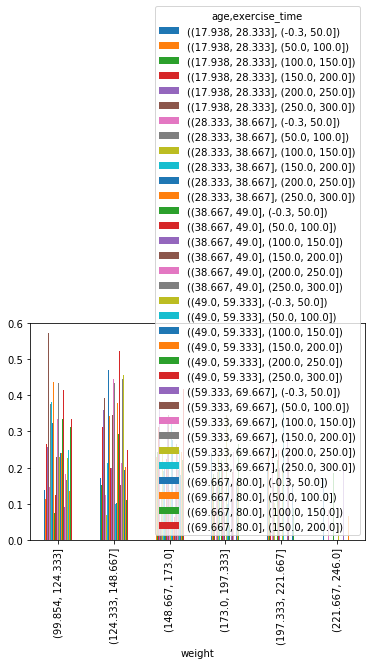

In [20]:
tab = pd.crosstab(weight_bins, [age_bins, exercise_bins], normalize = 'columns')
tab.plot(kind='bar')

This chart is useless. However! it and the previous weird "drop off"s of people at certain exercise threshholds and ages made me realize that I can probably decrease the number of age bins and weight bins down to 2. Because as I noted before, it looks like being young does not do much for your weight, but being old can. And for humans, depending on sex and size, 90-170 lbs is pretty healthy, and where I'd expect most exercising adults to be, where everything close to and above 200 lbs (unless you are JACKED) is where I'd expect most non-exercising adults to be. 

In [0]:
weight_bins = pd.cut(weight_data.weight, 2)
exercise_bins = pd.cut(weight_data.exercise_time, 2)
age_bins = pd.cut(weight_data.age, 2)

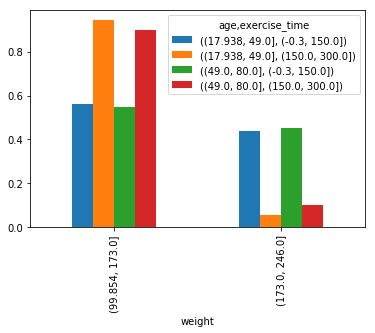

In [29]:
tab = pd.crosstab(weight_bins, [age_bins, exercise_bins], normalize = 'columns')
tab.plot(kind='bar')

This shows that decreasing the number of bins shows things a lot better. We clearly that exercise time has a clear relation 

In [0]:
weight_bins = pd.cut(weight_data.weight, 2)
exercise_bins = pd.cut(weight_data.exercise_time, 3)
age_bins = pd.cut(weight_data.age, 2)

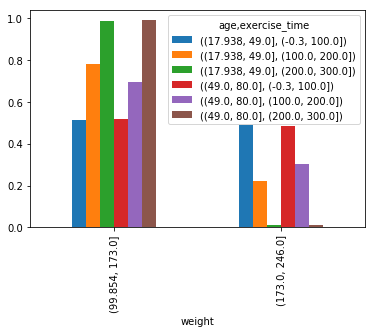

In [48]:
tab = pd.crosstab(weight_bins, [age_bins, exercise_bins], normalize = 'columns')
tab.plot(kind='bar')

Same as with the previous chart really, the more you exercise, the less you tend to weigh, regardless of age. Just thought I'd increase the number of bins for exercise time to check how much of an effect a middling amount of exercise can have vs. a large amount. Turns out to look pretty linear. 

Also, as a percentage, for each exercise amount level, the number of old vs young people is the same. Showing that age is probably NOT useful predictor in how much a person might weigh.

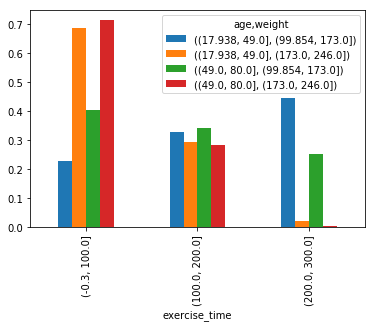

In [49]:
weight_bins = pd.cut(weight_data.weight, 2)
exercise_bins = pd.cut(weight_data.exercise_time, 3)
age_bins = pd.cut(weight_data.age, 2)

tab = pd.crosstab(exercise_bins , [age_bins, weight_bins], normalize = 'columns')
tab.plot(kind='bar')

This chart also shows there is a relationship between age and exercise time. The older you are, the less likely you are to get a lot of exercise.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? \\
These are discrete variables. Each variable was reported in integer amounts.

2.  What are the relationships between the variables? \\
There are three relationships: Age vs Weight, Weight vs Exercise, and Exercise vs Weight.

3.  Which relationships are "real", and which spurious? \\
$\>$ The more a person exercises, the less they tend to weigh. Note, this does not conclude that exercise leads to weight LOSS. The relation could be that people who exercise more can do so (and therefore do do so) because they weigh less. \\
$\>$ Also, the older you are, the less likely it is that you exercise. \\
$\>$ But finally, there is no direct relation between age and weight. If you exercise you are likely to weigh less even when you're old.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)